In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### import libraries

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [6]:
menus = pd.read_csv("/content/drive/MyDrive/MenuItem.csv")

In [6]:
menus

,Restaurant Name,Original food Item
0,Coffee Time,Garden Vegetable Sandwich
1,HoSan,Roasted Seaweed Snack
2,Weight Watchers,Muffins
3,Natural Sea,"Albacore Tuna, Solid White"
4,World of Beer,Caesar Salad with Grilled Flat Iron Steak
...,...,...
4519,Moxie's Classic Grill,Spring Mix Starter Salad
4520,Thundercloud Subs,"Genoa Salami Low-Fat Sub, Large"
4521,Chick-fil-A,"Cookies & Cream Milkshake, Small"
4522,Cereality,2% Milk


In [7]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 2.2 MB/s 
     |████████████████████████████████| 4.4 MB 20.9 MB/s 
     |████████████████████████████████| 1.2 MB 55.1 MB/s 
     |████████████████████████████████| 101 kB 12.1 MB/s 
     |████████████████████████████████| 596 kB 64.7 MB/s 
     |████████████████████████████████| 6.6 MB 56.8 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.1-py3-none-any.whl size=125774 sha256=effc67a0af70351e82d86797d51c9552b09464c6863827b73229639a4976dff2
  Stored in directory: /root/.cache/pip/wheels/58/27/2f/708b4f002c226e57b6243769da345c650633175c7634f93365
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## BERT sentence encoding.
Here we are using a bert model to encode each menu items into a vector with a size of 768.

In [8]:
from sentence_transformers import SentenceTransformer
model_path="paraphrase-distilroberta-base-v1"
model = SentenceTransformer(model_path)

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.74k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/718 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/329M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [9]:
corpus_embeddings = model.encode(menus['Original food Item'])
corpus_embeddings.shape

(4524, 768)

##PCA

In [10]:
X_std = StandardScaler().fit_transform(corpus_embeddings)

In [11]:
pca = PCA()
pca.fit_transform(X_std)

array([[ 2.80734420e+00, -6.86520624e+00, -1.36692178e+00, ...,
         4.72677648e-02, -6.52835816e-02, -8.88348154e-07],
       [ 4.72704458e+00, -3.45297670e+00,  1.52318060e+00, ...,
        -1.14944525e-01,  8.57385620e-02,  6.38870006e-07],
       [ 5.40401268e+00,  7.12455750e+00,  2.53759575e+00, ...,
        -1.95938647e-02,  7.97933266e-02,  1.39011297e-06],
       ...,
       [-5.79157305e+00, -3.70982480e+00,  6.72494459e+00, ...,
        -2.99417544e-02, -3.84195857e-02,  8.51562021e-09],
       [-2.65794516e+00,  8.56332111e+00, -2.95525408e+00, ...,
        -2.36759800e-02, -2.52448507e-02, -1.15605417e-07],
       [ 3.27538228e+00, -3.04393172e+00, -1.14597273e+00, ...,
        -1.47367343e-01,  4.93785962e-02,  1.49133669e-07]], dtype=float32)

In [12]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([4.71661501e-02, 4.20309491e-02, 3.26130539e-02, 2.64800005e-02,
       2.29042415e-02, 2.22720001e-02, 1.89740583e-02, 1.84794422e-02,
       1.75177846e-02, 1.66715086e-02, 1.51531482e-02, 1.41106294e-02,
       1.40923420e-02, 1.30086178e-02, 1.28269559e-02, 1.22806272e-02,
       1.22021986e-02, 1.18728206e-02, 1.16818929e-02, 1.15841627e-02,
       1.06556145e-02, 1.05129853e-02, 1.01919016e-02, 9.92480665e-03,
       9.46804322e-03, 9.25442856e-03, 8.83469358e-03, 8.77906382e-03,
       8.54095817e-03, 8.32944177e-03, 7.73684122e-03, 7.69103132e-03,
       7.40287872e-03, 7.30197411e-03, 7.24138459e-03, 7.06247380e-03,
       7.02042459e-03, 6.92306040e-03, 6.62441785e-03, 6.44588890e-03,
       6.32927381e-03, 6.23309985e-03, 6.15475327e-03, 5.85906161e-03,
       5.81429806e-03, 5.73049951e-03, 5.59960864e-03, 5.40273497e-03,
       5.21275820e-03, 5.12722414e-03, 5.04800817e-03, 4.97933896e-03,
       4.89463564e-03, 4.80661448e-03, 4.74079000e-03, 4.61025303e-03,
      

In [13]:
THRESHOLD = 0.01
reduced_explained_variance= [x for x in explained_variance if x>THRESHOLD]

To reduce the dimension of the data, I used a threshold value to filter out the dimensions that provides fewer variance. And use that as the number of components as the hyper-parameter for PCA.

In [14]:
n_compnents = len(reduced_explained_variance)
pca=PCA(n_components= n_compnents)
reduced_corpus_embeddings=pca.fit_transform(corpus_embeddings)
reduced_corpus_embeddings

array([[-1.1424652 , -1.16154   ,  0.03624767, ..., -0.6077559 ,
         0.58980614,  0.38600028],
       [-1.5075494 ,  0.07009023,  0.06376791, ...,  0.56622046,
         0.5106837 , -0.38817334],
       [-0.16544805,  1.8716112 ,  0.32654998, ...,  1.2084349 ,
        -0.3203508 , -0.7469138 ],
       ...,
       [ 0.9470687 , -0.84844184,  1.8754771 , ...,  0.48285866,
        -0.34081322, -0.20597592],
       [ 1.3630117 ,  1.4613345 , -0.26519182, ..., -1.0646011 ,
        -0.91356593,  0.01495976],
       [-0.5558034 , -0.3220701 , -0.08471708, ...,  0.614995  ,
        -0.41772503,  0.07617751]], dtype=float32)

## K-Means (k=3)

To choose an opimal K value, 'Elbow method' is first applied.

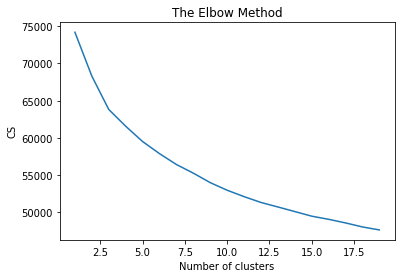

In [13]:
cs = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(reduced_corpus_embeddings)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 20), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

There is an obvious increase of gradient when the number of clusters is 3, so this is used as our temporary K value.

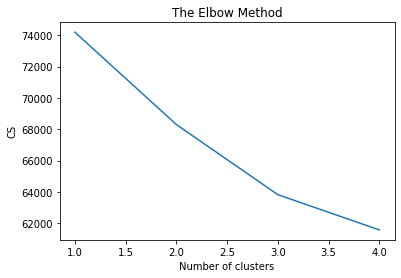

In [17]:
cs = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(reduced_corpus_embeddings)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 5), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [30]:
K = 3
kmeans = KMeans(n_clusters=K,random_state=0).fit(reduced_corpus_embeddings)
menus['labels'] = pd.Series(kmeans.labels_)

In [19]:
menus.head()

,Restaurant Name,Original food Item,labels
0,Coffee Time,Garden Vegetable Sandwich,2
1,HoSan,Roasted Seaweed Snack,2
2,Weight Watchers,Muffins,0
3,Natural Sea,"Albacore Tuna, Solid White",0
4,World of Beer,Caesar Salad with Grilled Flat Iron Steak,2


In [26]:
pca=PCA(n_components= 2)
two_d_corpus_embeddings=pca.fit_transform(reduced_corpus_embeddings)
x = [m[0] for m in two_d_corpus_embeddings]
y = [m[1] for m in two_d_corpus_embeddings]
#z = [m[0] for m in two_d_corpus_embeddings]
menus['x'] = pd.Series(x)
menus['y'] = pd.Series(y)

In [32]:
menus.loc[menus["labels"]==0,"labels"] = "Topic 0"
menus.loc[menus["labels"]==1,"labels"] = "Topic 1"
menus.loc[menus["labels"]==2,"labels"] = "Topic 2"

In [35]:
import plotly.express as px

fig = px.scatter(menus, x="x", y="y",
    color="labels", symbol="labels", hover_data=['Original food Item', 'Restaurant Name'],
    title="Scatter Graph") # remove underscore

fig.show()

Topic 0 contains mainly starters/small dishes. \
Topic 1 is mainly about drinks and desserts \
Topic 2 contains mainly main dishes

In order to see the possibility of seperating the desserts from the Topic 1 category, a K value of 4 is applied on the data.

## K-Means (k=4)

In [15]:
K = 4
kmeans = KMeans(n_clusters=K,random_state=0).fit(reduced_corpus_embeddings)
menus['labels'] = pd.Series(kmeans.labels_)

In [16]:
pca=PCA(n_components= 3)
two_d_corpus_embeddings=pca.fit_transform(reduced_corpus_embeddings)
x = [m[0] for m in two_d_corpus_embeddings]
y = [m[1] for m in two_d_corpus_embeddings]
z = [m[2] for m in two_d_corpus_embeddings]
menus['x'] = pd.Series(x)
menus['y'] = pd.Series(y)
menus['z'] = pd.Series(z)

In [17]:
menus.loc[menus["labels"]==0,"labels"] = "Topic 0"
menus.loc[menus["labels"]==1,"labels"] = "Topic 1"
menus.loc[menus["labels"]==2,"labels"] = "Topic 2"
menus.loc[menus["labels"]==3,"labels"] = "Topic 3"

In [3]:
import pandas as pd
menus = pd.read_csv("/content/drive/MyDrive/Menu.csv")

In [4]:
import plotly.express as px

fig = px.scatter(menus, x="x", y="y",
    color="labels", symbol="labels", hover_data=['Original food Item', 'Restaurant Name'],
    title="Scatter Graph")

fig.show()

The 2D plot is not so well represented thus plotting on a 3D plane.

In [19]:
import plotly.express as px

fig = px.scatter_3d(menus, x="x", y="y", z = "z",
    color="labels", symbol="labels", hover_data=['Original food Item', 'Restaurant Name'],
    title="Scatter Graph") # remove underscore

fig.show()

  However, through a rough sense check of different categories shown in the above scatter graph, I do not think it is a better separation of the classes, and a K value of 3 might provides a more optimal solution.